# Chapter 2.2 - Advanced Qbool

In this section of chapter 2 we will be walking through how to use Qbool variables in more complex expressions and assignments by chaining multiple operations together. We will also see how to analyze real world problems and break them down into an expression that can be solved by the Dwave quantum computer.

To start we will import the Qbool class from dann5 and create our complex expressions:

In [2]:
from dann5.d5 import Qbool

b0 = Qbool("b0")
b1 = Qbool("b1", False)
b2 = Qbool("b2")
b3 = Qbool("b3")
b4 = Qbool("b4")
br = Qbool("br", Qbool.true()) # you can set true or false this way as well

print(b0)
print(b1)
print(b2)
print(b3)
print(b4)
print(br)

b0\S\
b1\F\
b2\S\
b3\S\
b4\S\
br\T\


**Note**: As shown in the above code setting a value of False or Qbool.false() will functionally work the same way.

Now we will create our complex logic expression using the operators not equal (!=), AND (&), equal to (==) and OR (|). 

**Note**: There is no NAND operation or NOR operation. You can use the NOT (!) operation in combination with AND (&) and OR (!) to create the same end result.

In [3]:
expression = ((b3 != b4) & (b2 == b0)) | b1
print(expression, "\n")
print(expression.toString(True).replace(";", ";\n"))

(((b3\S\ != b4\S\) & (b2\S\ == b0\S\)) | b1\F\) 

_|0\S\ = _&0\S\ | b1\F\;
 _&0\S\ = b3\S\ & b2\S\;
 b3\S\ != b4\S\;
 b2\S\ == b0\S\;
 


In the output of the decomposed version of the expression we see that there are now 2 rules, due to the use of both comparison operators. (!=, ==)

So variable b3\S\ has to be not equal to b4\S\ and the variable b2\S\ has to be equal to the variable b0\S\.

Now we can solve the expression by importing the solver and using the solve() method:

In [4]:
from dann5.dwave import Solver 
Solver.Active() 
print(expression.solve())

_|0\F\; _&0\F\; b3\F\; b4\T\; b2\F\; b0\F\; b1\F\
_|0\F\; _&0\F\; b3\T\; b4\F\; b2\F\; b0\F\; b1\F\
_|0\F\; _&0\F\; b3\F\; b4\T\; b2\T\; b0\T\; b1\F\
_|0\T\; _&0\T\; b3\T\; b4\F\; b2\T\; b0\T\; b1\F\



To create the assignment we follow the same format by now assigning the expression to the result value of br, which we defined above as True.

In [5]:
qAssign = br._(((b3 != b4) & (b2 == b0)) | b1)
print("\n {} \n\n {}\n".format(qAssign, 
                               qAssign.toString(True).replace(";", ";\n")))


 br\T\ = (((b3\S\ != b4\S\) & (b2\S\ == b0\S\)) | b1\F\) 

 br\T\ = _&1\S\ | b1\F\;
 _&1\S\ = b3\S\ & b2\S\;
 b3\S\ != b4\S\;
 b2\S\ == b0\S\;
 



And from the solve we see that there is only one solution where the above expression will equal true. Again it is worth checking each of the decomposed expressions that make up the complex expression to guarantee the result is correct.

In [6]:
print(qAssign.solve())

br\T\; _&1\T\; b3\T\; b4\F\; b2\T\; b0\T\; b1\F\



# Real World Problem

Now we will be looking at a real world issue that can be solved using the Qbool variables and complex expressions. 

The problem is called the Antennas Selection issue. Looking at the image below we see 7 antennas and we need to see all possible selections of which to turn on so that they do not interfere with each other. While maximizing coverage. Any antenna that is connected with a line (edge) will interfere with one another. For example if both antenna 1 and 2 are on there will be an interference.

Now we will devise an expression using Qbool variables to symbolize the antennas to see all the possibilities where we can have the maximum number of antennas on without any interferences.

In [7]:
from dann5.d5 import Qbool

ant1 = Qbool("ant1")
ant2 = Qbool("ant2")
ant3 = Qbool("ant3")
ant4 = Qbool("ant4")
antr = Qbool("antr", True)

print(ant1)
print(ant2)
print(ant3)
print(ant4)

ant1\S\
ant2\S\
ant3\S\
ant4\S\


Going step by step we will start with one antenna which is quite simple to express.

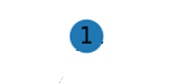

In [8]:
assignment1 = antr.assign(ant1)
print(assignment1.solve())

antr\T\; ant1\T\



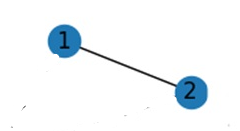

In [9]:
assignment2 = antr.assign(ant1 ^ ant2)
print(assignment2.solve())

antr\T\; ant1\F\; ant2\T\
antr\T\; ant1\T\; ant2\F\



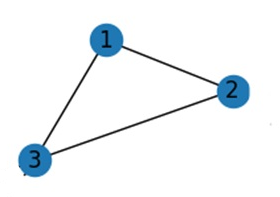

In [12]:
assignment3 = antr.assign(((ant1 ^ ant2) | (ant1 ^ ant3)) & (ant1.alike(ant2).alike(ant3)))
print(assignment3.solve())

# this statement will make the below results:
# ((ant1 ^ ant2) | (ant1 ^ ant3))

F alike T = False 
F alike F = True

# antr\T\; ant1\F\; ant2\F\; ant3\T\ *
# antr\T\; ant1\F\; ant2\T\; ant3\F\ *
# antr\T\; ant1\T\; ant2\F\; ant3\F\ *
# antr\T\; ant1\F\; ant2\T\; ant3\T\                          
# antr\T\; ant1\T\; ant2\F\; ant3\T\
# antr\T\; ant1\T\; ant2\T\; ant3\F\

# need to add this part to limit it to the three right answers:
# & (ant1.alike(ant2).alike(ant3)))

# creates triangular dependency

# antr\T\; ant1\F\; ant2\T\; ant3\F\;
# antr\T\; ant1\T\; ant2\F\; ant3\F\;
# antr\T\; ant1\F\; ant2\F\; ant3\T\;

antr\T\; _|4\T\; _^5\T\; ant1\F\; ant2\T\; _^6\F\; ant1\F\; ant3\F\; _!^5\T\; _!^4\F\; ant1\F\; ant2\T\; ant3\F\
antr\T\; _|4\T\; _^5\T\; ant1\T\; ant2\F\; _^6\T\; ant1\T\; ant3\F\; _!^5\T\; _!^4\F\; ant1\T\; ant2\F\; ant3\F\
antr\T\; _|4\T\; _^5\F\; ant1\F\; ant2\F\; _^6\T\; ant1\F\; ant3\T\; _!^5\T\; _!^4\T\; ant1\F\; ant2\F\; ant3\T\



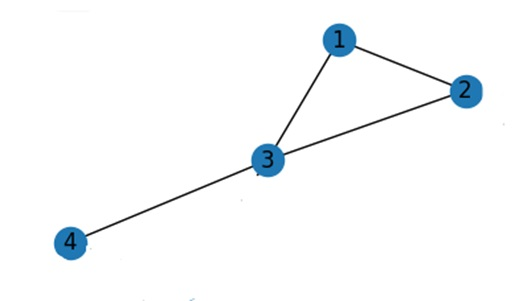

In [13]:
antF = Qbool("antF", False)
expression4 = ((ant1.alike(ant4)) ^ (ant4.alike(ant2))) & (ant3 ^ ant4) & (ant1 ^ ant2) & (ant4 ^ antF)

print(expression4, "\n")
print(expression4.toString(True).replace(";", ";\n"))

(((((ant1\S\ !^ ant4\S\) ^ (ant4\S\ !^ ant2\S\)) & (ant3\S\ ^ ant4\S\)) & (ant1\S\ ^ ant2\S\)) & (ant4\S\ ^ antF\F\)) 

_&7\S\ = _&6\S\ & _^10\S\;
 _&6\S\ = _&5\S\ & _^9\S\;
 _&5\S\ = _^7\S\ & _^8\S\;
 _^7\S\ = _!^6\S\ ^ _!^7\S\;
 _!^6\S\ = ant1\S\ !^ ant4\S\;
 _!^7\S\ = ant4\S\ !^ ant2\S\;
 _^8\S\ = ant3\S\ ^ ant4\S\;
 _^9\S\ = ant1\S\ ^ ant2\S\;
 _^10\S\ = ant4\S\ ^ antF\F\;
 


In [14]:
# expression2 = ((ant1 == ant4) ^ (ant2 == ant4)) & (ant3 != ant4) & (ant1 != ant2) & (ant4 != antF)
# antr\T\; ant1\T\; ant2\T\; ant3\F\; ant4\T\; 

In [15]:
print(expression4.solve())

_&7\F\; _&6\F\; _&5\F\; _^7\F\; _!^6\F\; ant1\F\; ant4\T\; _!^7\F\; ant4\T\; ant2\F\; _^8\T\; ant3\F\; ant4\T\; _^9\F\; ant1\F\; ant2\F\; _^10\T\; ant4\T\; antF\F\
_&7\F\; _&6\F\; _&5\F\; _^7\T\; _!^6\F\; ant1\T\; ant4\F\; _!^7\T\; ant4\F\; ant2\F\; _^8\F\; ant3\F\; ant4\F\; _^9\T\; ant1\T\; ant2\F\; _^10\F\; ant4\F\; antF\F\
_&7\F\; _&6\T\; _&5\T\; _^7\T\; _!^6\F\; ant1\T\; ant4\F\; _!^7\T\; ant4\F\; ant2\F\; _^8\T\; ant3\T\; ant4\F\; _^9\T\; ant1\T\; ant2\F\; _^10\F\; ant4\F\; antF\F\
_&7\F\; _&6\F\; _&5\F\; _^7\T\; _!^6\T\; ant1\F\; ant4\F\; _!^7\F\; ant4\F\; ant2\T\; _^8\F\; ant3\F\; ant4\F\; _^9\T\; ant1\F\; ant2\T\; _^10\F\; ant4\F\; antF\F\
_&7\F\; _&6\T\; _&5\T\; _^7\T\; _!^6\T\; ant1\F\; ant4\F\; _!^7\F\; ant4\F\; ant2\T\; _^8\T\; ant3\T\; ant4\F\; _^9\T\; ant1\F\; ant2\T\; _^10\F\; ant4\F\; antF\F\
_&7\F\; _&6\F\; _&5\F\; _^7\F\; _!^6\F\; ant1\T\; ant4\F\; _!^7\F\; ant4\F\; ant2\T\; _^8\F\; ant3\F\; ant4\F\; _^9\F\; ant1\T\; ant2\T\; _^10\F\; ant4\F\; antF\F\
_&7\F\; _&6\F\; 

In [16]:
expression4.reset()
assignment4 = antr.assign(expression4)  
print(assignment4.solve())

# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\T\;
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\T\;

antr\T\; _&6\T\; _&5\T\; _^7\T\; _!^6\T\; ant1\T\; ant4\T\; _!^7\F\; ant4\T\; ant2\F\; _^8\T\; ant3\F\; ant4\T\; _^9\T\; ant1\T\; ant2\F\; _^10\T\; ant4\T\; antF\F\
antr\T\; _&6\T\; _&5\T\; _^7\T\; _!^6\F\; ant1\F\; ant4\T\; _!^7\T\; ant4\T\; ant2\T\; _^8\T\; ant3\F\; ant4\T\; _^9\T\; ant1\F\; ant2\T\; _^10\T\; ant4\T\; antF\F\



In [17]:
# assignment4 = antr.assign(expression2)  
# print(assignment4.solve())

# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\T\; 
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\T\; 


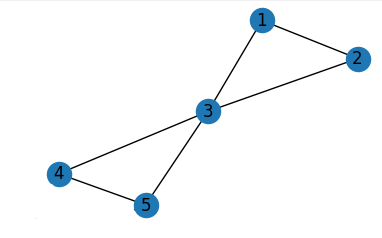

In [19]:
ant5 = Qbool("ant5")
expression5 = (ant1 ^ ant2) & (ant3.alike(antF)) & (ant5 ^ ant4)
assignment5 = antr.assign(expression5)

print(assignment5.solve())

# using the method alike(antF) on any node (antenna) will make sure it is never turned on
# (ant3.alike(antF))

# this way will create the least amount of nodes in the quantum equation which will result in simplest and fastest solution

# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\F\; ant5\T\; = 2, 5
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\T\; ant5\F\; = 2, 4
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\F\; ant5\T\; = 1, 5
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\T\; ant5\F\; = 1, 4

antr\T\; _&10\T\; _^13\T\; ant1\F\; ant2\T\; _!^9\T\; ant3\F\; antF\F\; _^14\T\; ant5\T\; ant4\F\
antr\T\; _&10\T\; _^13\T\; ant1\F\; ant2\T\; _!^9\T\; ant3\F\; antF\F\; _^14\T\; ant5\F\; ant4\T\
antr\T\; _&10\T\; _^13\T\; ant1\T\; ant2\F\; _!^9\T\; ant3\F\; antF\F\; _^14\T\; ant5\T\; ant4\F\
antr\T\; _&10\T\; _^13\T\; ant1\T\; ant2\F\; _!^9\T\; ant3\F\; antF\F\; _^14\T\; ant5\F\; ant4\T\



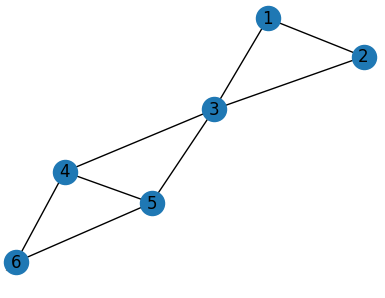

In [20]:
ant6 = Qbool("ant6")
expression6 = ((ant1 ^ ant2) | (ant1 ^ ant3)) & (ant1.alike(ant2).alike(ant3)) & ((ant4 ^ ant5) | (ant4 ^ ant6)) & (ant4.alike(ant5).alike(ant6))  

# Add this to create another triangle dependency
# might work, takes too long to run on simulator
# & ((ant3 ^ ant4) | (ant3 ^ ant5)) & (ant3.alike(ant4).alike(ant5))
qAssign6 = antr.assign(expression6)

print(qAssign6.solve())

# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\F\; ant5\T\; ant6\F\; = 2, 5 
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\T\; ant5\F\; ant6\F\; = 2, 4
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\F\; ant5\T\; ant6\F\; = 1, 5
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\T\; ant5\F\; ant6\F\; = 1 , 4
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\F\; ant5\F\; ant6\T\; = 2, 6
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\F\; ant5\F\; ant6\T\; = 1, 6
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\T\; ant6\F\; = 3, 5 * 
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\T\; ant5\F\; ant6\F\; = 3, 4 *
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\F\; ant6\T\; = 3, 6


antr\T\; _&13\T\; _&12\T\; _|5\T\; _^15\T\; ant1\F\; ant2\T\; _^16\F\; ant1\F\; ant3\F\; _!^11\T\; _!^10\F\; ant1\F\; ant2\T\; ant3\F\; _|6\T\; _^17\T\; ant4\F\; ant5\T\; _^18\F\; ant4\F\; ant6\F\; _!^13\T\; _!^12\F\; ant4\F\; ant5\T\; ant6\F\
antr\T\; _&13\T\; _&12\T\; _|5\T\; _^15\T\; ant1\F\; ant2\T\; _^16\F\; ant1\F\; ant3\F\; _!^11\T\; _!^10\F\; ant1\F\; ant2\T\; ant3\F\; _|6\T\; _^17\T\; ant4\T\; ant5\F\; _^18\T\; ant4\T\; ant6\F\; _!^13\T\; _!^12\F\; ant4\T\; ant5\F\; ant6\F\
antr\T\; _&13\T\; _&12\T\; _|5\T\; _^15\T\; ant1\T\; ant2\F\; _^16\T\; ant1\T\; ant3\F\; _!^11\T\; _!^10\F\; ant1\T\; ant2\F\; ant3\F\; _|6\T\; _^17\T\; ant4\F\; ant5\T\; _^18\F\; ant4\F\; ant6\F\; _!^13\T\; _!^12\F\; ant4\F\; ant5\T\; ant6\F\
antr\T\; _&13\T\; _&12\T\; _|5\T\; _^15\T\; ant1\T\; ant2\F\; _^16\T\; ant1\T\; ant3\F\; _!^11\T\; _!^10\F\; ant1\T\; ant2\F\; ant3\F\; _|6\T\; _^17\T\; ant4\T\; ant5\F\; _^18\T\; ant4\T\; ant6\F\; _!^13\T\; _!^12\F\; ant4\T\; ant5\F\; ant6\F\
antr\T\; _&13\T\; _&12\T

In [35]:
from dann5.dwave import QuboSolvers

ant6 = Qbool("ant6")
expression6b = ((ant1 ^ ant2) | (ant1 ^ ant3)) & (ant1.alike(ant2).alike(ant3)) & ((ant4 ^ ant5) | (ant4 ^ ant6)) & (ant4.alike(ant5).alike(ant6)) & ((ant3 ^ ant4) | (ant3 ^ ant5)) & (ant3.alike(ant4).alike(ant5)) 

qAssign6b = antr.assign(expression6b)

Solver.SetActive(QuboSolvers.solver("Advantage"))

print(qAssign6b.solve())


# Hybrid
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\F\; ant5\T\; ant6\F\; = 2, 5
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\F\; ant6\T\; = 3, 6

#Advantage
# 1st run
# antr\T\; ant1\F\; ant2\F\; ant3\F\; ant4\T\; ant5\F\; ant6\T\; 
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\T\; ant5\F\; ant6\F\; 
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\T\; ant6\F\; 

# 2nd run
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\F\; ant5\T\; ant6\T\; 

# 3rd run
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\F\; ant6\T\; = 3, 6

# Advantage 2
# 1st run
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\F\; ant6\T\;

# 2nd run
# antr\T\; ant1\F\; ant2\F\; ant3\T\; ant4\F\; ant5\F\; ant6\T\; = 3, 6
# antr\T\; ant1\T\; ant2\F\; ant3\F\; ant4\T\; ant5\F\; ant6\F\; = 1, 4
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\T\; ant5\F\; ant6\F\; = 2, 4
# antr\T\; ant1\F\; ant2\T\; ant3\F\; ant4\F\; ant5\T\; ant6\F\; = 2, 5

antr\T\; _&79\T\; _&78\T\; _&77\T\; _&76\T\; _|34\T\; _^84\F\; ant1\F\; ant2\F\; _^85\T\; ant1\F\; ant3\T\; _!^79\T\; _!^78\T\; ant1\F\; ant2\F\; ant3\T\; _|35\T\; _^86\F\; ant4\F\; ant5\F\; _^87\T\; ant4\F\; ant6\T\; _!^81\T\; _!^80\T\; ant4\F\; ant5\F\; ant6\T\; _|36\T\; _^88\T\; ant3\T\; ant4\F\; _^89\T\; ant3\T\; ant5\F\; _!^83\T\; _!^82\F\; ant3\T\; ant4\F\; ant5\F\



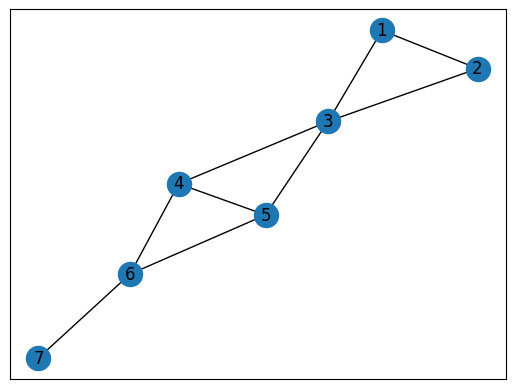

In [38]:
ant7 = Qbool("ant7")
expression7 = (ant3.alike(antF) & ant6.alike(antF) & (ant7 ^ antF)) & (ant1 ^ ant2) & (ant4 ^ ant5)
assignment7 = antr.assign(expression7)

print(assignment7.solve())

# key here is to group all known node values together into one statement, i.e. we know 3, 6 must be off and 7 must be on
# (ant3.alike(antF) & ant6.alike(antF) & ant7 ^ antF) 

# then we can and the other conditions
#  & (ant1 ^ ant2) & (ant4 ^ ant5)

# antr\T\; ant3\F\; ant6\F\; ant7\T\; ant1\F\; ant2\T\; ant4\F\; ant5\T\ = 7, 2, 5
# antr\T\; ant3\F\; ant6\F\; ant7\T\; ant1\F\; ant2\T\; ant4\T\; ant5\F\ = 7, 2, 4
# antr\T\; ant3\F\; ant6\F\; ant7\T\; ant1\T\; ant2\F\; ant4\F\; ant5\T\ = 7, 1, 5
# antr\T\; ant3\F\; ant6\F\; ant7\T\; ant1\T\; ant2\F\; ant4\T\; ant5\F\ = 7, 1, 4

antr\T\; _&91\T\; _&90\T\; _&89\T\; _!^88\T\; ant3\F\; antF\F\; _!^89\T\; ant6\F\; antF\F\; _^96\T\; ant7\T\; antF\F\; _^97\T\; ant1\T\; ant2\F\; _^98\T\; ant4\F\; ant5\T\
antr\T\; _&91\T\; _&90\T\; _&89\T\; _!^88\T\; ant3\F\; antF\F\; _!^89\T\; ant6\F\; antF\F\; _^96\T\; ant7\T\; antF\F\; _^97\T\; ant1\F\; ant2\T\; _^98\T\; ant4\T\; ant5\F\
antr\T\; _&91\T\; _&90\T\; _&89\T\; _!^88\T\; ant3\F\; antF\F\; _!^89\T\; ant6\F\; antF\F\; _^96\T\; ant7\T\; antF\F\; _^97\T\; ant1\F\; ant2\T\; _^98\T\; ant4\F\; ant5\T\
antr\T\; _&91\T\; _&90\T\; _&89\T\; _!^88\T\; ant3\F\; antF\F\; _!^89\T\; ant6\F\; antF\F\; _^96\T\; ant7\T\; antF\F\; _^97\T\; ant1\T\; ant2\F\; _^98\T\; ant4\T\; ant5\F\



In [68]:
# a == c\
# |    | e
# b == d/

# a, e 
# a, d
# b, e
# b, c

a = Qbool("a")
b = Qbool("b")
c = Qbool("c")
d = Qbool("d")
e = Qbool("e")
result = Qbool("res", True)

triExpr = ((c ^ d)| (c ^ e)) & (c.alike(d).alike(e))
sqExpr = (((a ^ b) & (b ^ d)) | ((a ^ b) & (a ^ c)))

qassignHouse = result.assign(sqExpr & triExpr)

print(qassignHouse.solve())

# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\; = b, c 
# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\; = a, d

# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\; = a, d
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\; = b, c

# res\T\; a\F\; b\T\; c\F\; d\F\; e\T\; = b, e
# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\; = a, e

# res\T\; a\F\; b\T\; c\F\; d\T\; e\F\; = b, d *
# res\T\; a\T\; b\F\; c\T\; d\F\; e\F\; = a, c *


# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\
# res\T\; a\F\; b\T\; c\F\; d\F\; e\T\
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\


# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\; = a, e
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\; = b, c
# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\; = a, d

# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\; = a, e
# res\T\; a\F\; b\T\; c\F\; d\F\; e\T\; = b, e
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\; = b, c

# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\; = a, e
# res\T\; a\F\; b\T\; c\F\; d\F\; e\T\; = b, e
# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\; = a, d

# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\;
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\;
# res\T\; a\T\; b\F\; c\F\; d\F\; e\T\

# res\T\; a\T\; b\F\; c\F\; d\T\; e\F\; 
# res\T\; a\F\; b\T\; c\T\; d\F\; e\F\;


res\T\; _|70\T\; _&173\T\; _^208\T\; a\T\; b\F\; _^209\T\; b\F\; d\T\; _&174\T\; _^210\T\; a\T\; b\F\; _^211\T\; a\T\; c\F\; _&172\T\; _|69\T\; _^206\T\; c\F\; d\T\; _^207\F\; c\F\; e\F\; _!^163\T\; _!^162\F\; c\F\; d\T\; e\F\
res\T\; _|70\T\; _&173\T\; _^208\T\; a\F\; b\T\; _^209\T\; b\T\; d\F\; _&174\T\; _^210\T\; a\F\; b\T\; _^211\T\; a\F\; c\T\; _&172\T\; _|69\T\; _^206\T\; c\T\; d\F\; _^207\T\; c\T\; e\F\; _!^163\T\; _!^162\F\; c\T\; d\F\; e\F\



In [48]:
# a == c
# |    | 
# b == d

# a, e 
# a, d
# b, e
# b, c

boxExpr = (a ^ b) & (b ^ d) & (a ^ c)

qassignBox = result.assign(boxExpr)

print(qassignBox.solve())

res\T\; _&116\T\; _^127\T\; a\T\; b\F\; _^128\T\; b\F\; d\T\; _^129\T\; a\T\; c\F\
res\T\; _&116\T\; _^127\T\; a\F\; b\T\; _^128\T\; b\T\; d\F\; _^129\T\; a\F\; c\T\



In [74]:
from dann5.d5 import Qblock
triExpr = ((c ^ d)| (c ^ e)) & (c.alike(d).alike(e))
sqExpr2 = (a ^ b) & (b ^ d) & (a ^ c)



assignTri = result.assign(triExpr2)
assignSqr = result.assign(sqExpr2)

block = Qblock() << assignSqr << assignTri

print(block.solve())

# res\T\; _&183\T\; _^224\T\; a\F\; b\T\; _^225\T\; b\T\; d\F\; _^226\T\; a\F\; c\T\ res\T\; _|73\T\; _^222\T\; c\T\; d\F\; _^223\T\; c\T\; e\F\; _!^169\T\; _!^168\F\; c\T\; d\F\; e\F\
# res\T\; _&183\T\; _^224\T\; a\T\; b\F\; _^225\T\; b\F\; d\T\; _^226\T\; a\T\; c\F\ res\T\; _|73\T\; _^222\T\; c\F\; d\T\; _^223\F\; c\F\; e\F\; _!^169\T\; _!^168\F\; c\F\; d\T\; e\F\

 res\T\; _&187\T\; _^236\T\; a\T\; b\F\; _^237\T\; b\F\; d\T\; _^238\T\; a\T\; c\F\ res\T\; _^232\T\; c\F\; d\T\; _^235\T\; _^233\F\; d\T\; e\T\; _^234\T\; c\F\; e\T\
 res\T\; _&187\T\; _^236\T\; a\T\; b\F\; _^237\T\; b\F\; d\T\; _^238\T\; a\T\; c\F\ res\T\; _^232\T\; c\F\; d\T\; _^235\T\; _^233\T\; d\T\; e\F\; _^234\F\; c\F\; e\F\
 res\T\; _&187\T\; _^236\T\; a\F\; b\T\; _^237\T\; b\T\; d\F\; _^238\T\; a\F\; c\T\ res\T\; _^232\T\; c\T\; d\F\; _^235\T\; _^233\F\; d\F\; e\F\; _^234\T\; c\T\; e\F\
 res\T\; _&187\T\; _^236\T\; a\F\; b\T\; _^237\T\; b\T\; d\F\; _^238\T\; a\F\; c\T\ res\T\; _^232\T\; c\T\; d\F\; _^235\T\; _^233\T\; d\F\; e\T\; _^234\F\; c\T\; e\T\



In [81]:
triExpr3 = ((c ^ d) | (c ^ e)) & (c.alike(d).alike(e))
assignTri3 = result.assign(triExpr3)
print(assignTri3.solve())
            

res\T\; _|79\T\; _^247\T\; d\T\; e\F\; _^248\F\; c\F\; e\F\; _!^183\T\; _!^182\F\; c\F\; d\T\; e\F\
res\T\; _|79\T\; _^247\F\; d\F\; e\F\; _^248\T\; c\T\; e\F\; _!^183\T\; _!^182\F\; c\T\; d\F\; e\F\
res\T\; _|79\T\; _^247\T\; d\F\; e\T\; _^248\T\; c\F\; e\T\; _!^183\T\; _!^182\T\; c\F\; d\F\; e\T\

